In [ ]:
!pip install mp-api pandas skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.1/107.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.2/306.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 5.2 MB/s eta 0:00:00
   ━━━

In [ ]:
import os
from google.colab import userdata


MP_API_KEY = userdata.get('MP_API_KEY') # retrieves the MP API key from the environment variable

if not MP_API_KEY: # displays an error message if the MP API key was not found
    raise RuntimeError(
        "No API key found. Set the MP_API_KEY environment variable."
    )

DATA LOADING

In [ ]:
from emmet.core.summary import HasProps
from mp_api.client import MPRester

with MPRester(MP_API_KEY) as mpr:
  link = mpr.materials.summary
  data = link.search(
      has_props=[HasProps.elasticity] # request for all materials with elasticity properties
  )

Retrieving SummaryDoc documents:   0%|          | 0/10994 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/mp_api/client/core/client.py:825: UserWarning: Use the 'fields' argument to select only fields of interest to speed up data retrieval for large queries. Choose from: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'property_name', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula

In [ ]:
import pandas as pd

# Convert SummaryDoc items to dictionaries, then load them into a DataFrame
records = [d.model_dump() for d in data]
data_df = pd.DataFrame.from_records(records)

print(f"Número de materiais para análise: {len(data_df)}")

FIELDS = data_df.columns
# non selected, symbolic and semistructured data features not to be included in
# future analysis with machine learning algorithms
SYM_FEATURES = ['builder_meta', 'composition', 'warnings',
                'composition_reduced', 'formula_pretty',
                'formula_anonymous', 'chemsys',
                'material_id', 'deprecated', 'deprecation_reasons',
                'last_updated', 'origins', 'property_name',
                'task_ids', 'is_stable',
                'decomposes_to', 'xas', 'grain_boundaries', 'is_gap_direct',
                'is_metal', 'es_source_calc_id',
                 'bandstructure', 'dos',
                'dos_energy_up', 'dos_energy_down',
                 'is_magnetic', 'ordering',
                'types_of_magnetic_species',
                'weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy',
                'weighted_work_function', 'surface_anisotropy', 'shape_factor',
                'has_reconstructed', 'possible_species', 'has_props', 'theoretical',
                'database_IDs', 'fields_not_requested',
                 'total_magnetization_normalized_vol',
                 'total_magnetization_normalized_formula_units',
]

data_df.drop(columns=SYM_FEATURES, inplace=True) # remove as colunas com dados simbolicos, mantendo apenas dados numericos

data_df.info()

Número de materiais para análise: 10994
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994 entries, 0 to 10993
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   nsites                                10994 non-null  int64  
 1   elements                              10994 non-null  object 
 2   nelements                             10994 non-null  int64  
 3   volume                                10994 non-null  float64
 4   density                               10994 non-null  float64
 5   density_atomic                        10994 non-null  float64
 6   symmetry                              10994 non-null  object 
 7   structure                             10994 non-null  object 
 8   uncorrected_energy_per_atom           10994 non-null  float64
 9   energy_per_atom                       10994 non-null  float64
 10  formation_energy_per_atom             1099

In [ ]:
# remove features with few or absent data, based in the summary above
# and compared with total amount of data records
REMOVE_FEATURES = ["equilibrium_reaction_energy_per_atom",
                   "cbm", "vbm",
                   "e_total","e_ionic","e_electronic",
                   "n", "e_ij_max"
]

data_df.drop(columns=REMOVE_FEATURES, inplace=True)

DATA TRANSFORMATION

In [ ]:
# DATA TRANFORMATION FOR BULK_MODULUS AND SHEAR_MODULUS

# Separe data from dict in columns
bulk_cols = data_df['bulk_modulus'].apply(pd.Series)
shear_cols = data_df['shear_modulus'].apply(pd.Series)

# Rename columns
bulk_cols = bulk_cols.rename(columns={
    'voigt': 'bulk_modulus_voigt',
    'reuss': 'bulk_modulus_reuss',
    'vrh': 'bulk_modulus_vrh'
})
shear_cols = shear_cols.rename(columns={
    'voigt': 'shear_modulus_voigt',
    'reuss': 'shear_modulus_reuss',
    'vrh': 'shear_modulus_vrh'
})

# Concatenate with the original DataFrame (without the old semistructured columns)
data_df = pd.concat([data_df.drop(columns=['bulk_modulus']), bulk_cols], axis=1)
data_df = pd.concat([data_df.drop(columns=['shear_modulus']), shear_cols], axis=1)


# DATA: symmetry -> symmetry's number
data_df['symmetry'] = data_df['symmetry'].apply(lambda x: x['number'])


# LATTICE PARAMETER DATA SEPARTION/TRANSFORM
# Extract only lattice parameters from 'structure'
lattice_cols = data_df['structure'].apply(lambda x: {
    'a': x['lattice']['a'],
    'b': x['lattice']['b'],
    'c': x['lattice']['c'],
    'alpha': x['lattice']['alpha'],
    'beta': x['lattice']['beta'],
    'gamma': x['lattice']['gamma']
})

# Transform columns
df_lattice = pd.DataFrame(lattice_cols.tolist())

# Concatenate with the original DataFrame (without the 'lattice' column)
data_df = pd.concat([data_df.drop(columns=['structure']), df_lattice], axis=1)



In [ ]:
# LIST OF ELEMENTS
print("List - # of elements")
for el in data_df['elements']:
  print(el, " - ", len(el))

List - # of elements


,elements
0,[Si]
1,[Ta]
2,[Bi]
3,[Te]
4,[C]
...,...
10989,"[Al, Ca, H, O, Si]"
10990,"[Ag, H, N, S, W]"
10991,"[Ba, Cu, O, Sb, Y]"
10992,"[B, C, H, Mg, N, O]"


In [ ]:
data_df.drop(columns=["elements"], inplace=True)

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10994 entries, 0 to 10993
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nsites                       10994 non-null  int64  
 1   nelements                    10994 non-null  int64  
 2   volume                       10994 non-null  float64
 3   density                      10994 non-null  float64
 4   density_atomic               10994 non-null  float64
 5   symmetry                     10994 non-null  int64  
 6   uncorrected_energy_per_atom  10994 non-null  float64
 7   energy_per_atom              10994 non-null  float64
 8   formation_energy_per_atom    10994 non-null  float64
 9   energy_above_hull            10994 non-null  float64
 10  band_gap                     10994 non-null  float64
 11  efermi                       10994 non-null  float64
 12  total_magnetization          10994 non-null  float64
 13  num_magnetic_sit

In [ ]:
# some statistical data
data_df['bulk_modulus_voigt'].describe()

,bulk_modulus_voigt
count,10994.000000
mean,105.077534
std,73.954878
min,0.098000
25%,47.433250
50%,86.858000
75%,149.148000
max,491.593000


HISTOGRAM (Target) AND REDUCING DIMENSIONALITY (Features)


In [ ]:
# Number of elements
total = len(data_df['bulk_modulus_voigt'])

# Number of elements with bulk_modulus_voigt lower than 200
abaixo_200 = (data_df['bulk_modulus_voigt'] < 200).sum()

# Percentual
percentual = (abaixo_200 / total) * 100
print("Percentual de materiais com bulk_modulus_voigt abaixo de 200 GPa",percentual, "%")

Percentual de materiais com bulk_modulus_voigt abaixo de 200 GPa 88.60287429507004 %


Analisando distribuição normal de  bulk_modulus_voigt


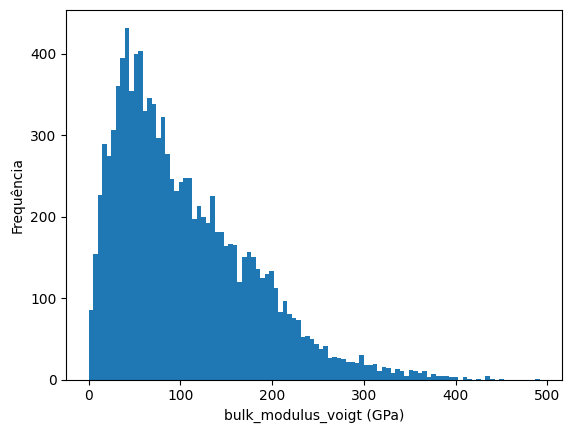

p-value (shapiro): 2.123212640892522e-59
p-value (kolmogorov-smirnov): 0.0
p-value: 0.0


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10994.
  res = hypotest_fun_out(*samples, **kwds)


<Figure size 640x480 with 0 Axes>

In [ ]:
target = "bulk_modulus_voigt"
print("Analisando distribuição normal de ", target)

data_df[target].hist(bins=100, grid=False)
plt.xlabel(f'{target} (GPa)')
plt.ylabel("Frequência")
plt.show()

plt.figure()
import scipy.stats as stats

#stats.probplot(data_df[target], dist="norm", plot=plt)
#plt.show()

# If p > 0.05 (considers it normal), we do not reject the hypothesis of normality.
stat, p = stats.shapiro(data_df[target])
print("p-value (shapiro):", p)

# assesses adherence to normal.
stat, p = stats.kstest(data_df[target], "norm")
print("p-value (kolmogorov-smirnov):", p)

# used to check for normality in larger samples.
stat, p = stats.normaltest(data_df[target])
print("p-value:", p)

FEATURE SELECTION

In [ ]:
# features to be used
FEATURES_MANTER = ["nsites",
                   "nelements",
                   "volume",
                   "density",
                   "density_atomic",
                   "symmetry",
                   "uncorrected_energy_per_atom",
                   "energy_per_atom",
                   "formation_energy_per_atom",
                   "efermi",
                   "energy_above_hull",
                   "band_gap",
                   "total_magnetization",
                   "num_unique_magnetic_sites",
                   "universal_anisotropy",
                   "homogeneous_poisson",
                   "a", "b", "c", "alpha", "beta", "gamma",
                   ]

POSSIBLE_TARGETS = ["shear_modulus_reuss",
                   "shear_modulus_voigt",
                   "shear_modulus_vrh",
                   "bulk_modulus_reuss",
                   "bulk_modulus_vrh",
                   ]
TARGET = ["bulk_modulus_voigt"]

norm_data = True


In [ ]:
# Number of features
len(FEATURES_MANTER)

22

In [ ]:
# MLP network implemented using torch
# and converted to a sklearn estimator type

import torch
import torch.nn as nn
import torch.optim as optim
from skorch import NeuralNetRegressor

class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.mlp = nn.Sequential(
        nn.Linear(len(FEATURES_MANTER), 150),
        nn.ReLU(),
        nn.Linear(150, 100),
        nn.ReLU(),
        nn.Linear(100, 50),
        nn.ReLU(),
        nn.Linear(50, 1),
    )

  def forward(self, X):
    return self.mlp(X)


netMLP = NeuralNetRegressor(
    MLP,
    max_epochs=150,
    lr=0.01,
    optimizer=optim.Adam,
    criterion=nn.MSELoss,
    iterator_train__shuffle=True,
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.inspection import permutation_importance

TEST_SIZE = 0.2
RANDOM_SEED = 777

df = data_df.drop(columns=POSSIBLE_TARGETS)
df = df[FEATURES_MANTER]
FEATURES = df.columns
df[TARGET] = data_df[TARGET]

# separate data in train and test sets
indexes = df.index
train_indexes, test_indexes = train_test_split(
    indexes,
    test_size=TEST_SIZE,
    random_state=RANDOM_SEED,
)

df_train = df.loc[train_indexes]
df_test = df.loc[test_indexes]

X_train = df_train.reindex(FEATURES, axis=1).values
y_train = df_train.reindex(TARGET, axis=1).values.ravel()
X_test = df_test.reindex(FEATURES, axis=1).values
y_test = df_test.reindex(TARGET, axis=1).values.ravel()


# normalize data
if norm_data:
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

# baseline regressor (for comparison)
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)

# linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)



LinearRegression()

In [ ]:
# GradientBoostingRegressor estimator
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5)

In [ ]:
# MLP sklearn estimator
mlp_sk = MLPRegressor(max_iter=150,
                      hidden_layer_sizes=(150,100,50),
                      activation='relu', solver='adam',
                      learning_rate_init=0.01,
                      random_state=RANDOM_SEED)
mlp_sk.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(150, 100, 50), learning_rate_init=0.01,
             max_iter=150, random_state=777)

In [ ]:
import numpy as np

# MLPRegressor (implemented and converted from torch)
netMLP.fit(X_train.astype(np.float32), y_train.astype(np.float32))

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1     7482.0438     5508.8064  0.3381


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([124])) that is different to the input size (torch.Size([124, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:634: UserWarning: Using a target size (torch.Size([95])) that is different to the input size (torch.Size([95, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


      2     5643.4467     5413.9458  0.1989
      3     5592.3201     5351.6754  0.1803
      4     5581.4919     5306.1694  0.1795
      5     5561.5401     5304.3106  0.1801
      6     5576.0284     5292.8753  0.1798
      7     5562.6249     5462.2058  0.1810
      8     5634.3213     5280.4039  0.1990
      9     5533.6313     5410.0350  0.1777
     10     5662.7848     5368.0364  0.1907
     11     5526.7563     5464.0896  0.1822
     12     5503.5095     5511.6780  0.1822
     13     5525.0547     5308.2555  0.2001
     14     5513.1960     5352.3213  0.1882
     15     5535.1977     5277.4416  0.1989
     16     5505.1604     5283.8262  0.2034
     17     5504.0210     5259.6960  0.2021
     18     5540.2664     5276.0375  0.2183
     19     5556.4790     5288.7859  0.1967
     20     5498.7630     5335.8434  0.1952
     21     5529.7631     5325.9762  0.2014
     22     5564.2393     5317.1595  0.2000
     23     5547.1965     5527.7366  0.2113
     24     5541.7806     5289.6

<class 'skorch.regressor.NeuralNetRegressor'>[initialized](
  module_=MLP(
    (mlp): Sequential(
      (0): Linear(in_features=22, out_features=150, bias=True)
      (1): ReLU()
      (2): Linear(in_features=150, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=50, bias=True)
      (5): ReLU()
      (6): Linear(in_features=50, out_features=1, bias=True)
    )
  ),
)

In [ ]:
models = {
    'Baseline': baseline,
    'LinearRegression': lr,
    'MLP_sk': mlp_sk, # MLP sklearn
    'MLP': netMLP, # MLP torch
    'GradientBoosting': gbr,
}

for name, model in models.items():
    if name == 'MLP': # if MLP (implemented from torch)
      result = permutation_importance(model,
                                      X_test.astype(np.float32), y_test.astype(np.float32),
                                      n_repeats=10, random_state=42)
      importances = pd.Series(result.importances_mean, index=FEATURES).sort_values(ascending=False)
      y_pred = model.predict(X_test.astype(np.float32))
    else: # for other estimators
      result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
      importances = pd.Series(result.importances_mean, index=FEATURES).sort_values(ascending=False)
      y_pred = model.predict(X_test)

    print(f'================{name}=====================')
    print(f'FEATURES IMPORTANCES FOR MODEL: {name}')
    print(importances)
    print()

    print(f'BEST PARAMS:')
    print(model.get_params())
    print()

    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
    print("Root Mean Squared Error:", metrics.root_mean_squared_error(y_test, y_pred))
    print("R2 score:", metrics.r2_score(y_pred, y_test))
    print()

================Baseline=====================
FEATURES IMPORTANCES FOR MODEL: Baseline
nsites                         0.0
nelements                      0.0
volume                         0.0
density                        0.0
density_atomic                 0.0
symmetry                       0.0
uncorrected_energy_per_atom    0.0
energy_per_atom                0.0
formation_energy_per_atom      0.0
efermi                         0.0
energy_above_hull              0.0
band_gap                       0.0
total_magnetization            0.0
num_unique_magnetic_sites      0.0
universal_anisotropy           0.0
homogeneous_poisson            0.0
a                              0.0
b                              0.0
c                              0.0
alpha                          0.0
beta                           0.0
gamma                          0.0
dtype: float64

BEST PARAMS:
{'constant': None, 'quantile': None, 'strategy': 'mean'}

Mean Absolute Error: 60.40871278923879
Root Mean Squared

GENERATING DATA FOR VALIDATION AND TRAINING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

mlp = MLPRegressor(max_iter=150,
                      hidden_layer_sizes=(150,100,50),
                      activation='relu', solver='adam',
                      learning_rate_init=0.01,
                      warm_start=True,
                      random_state=RANDOM_SEED)

# Generates learning curves
train_sizes, train_scores, val_scores = learning_curve(
    mlp, X_train, y_train, cv=5,
    #train_sizes=np.linspace(0.1, 1.0, 100)
)

# Mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

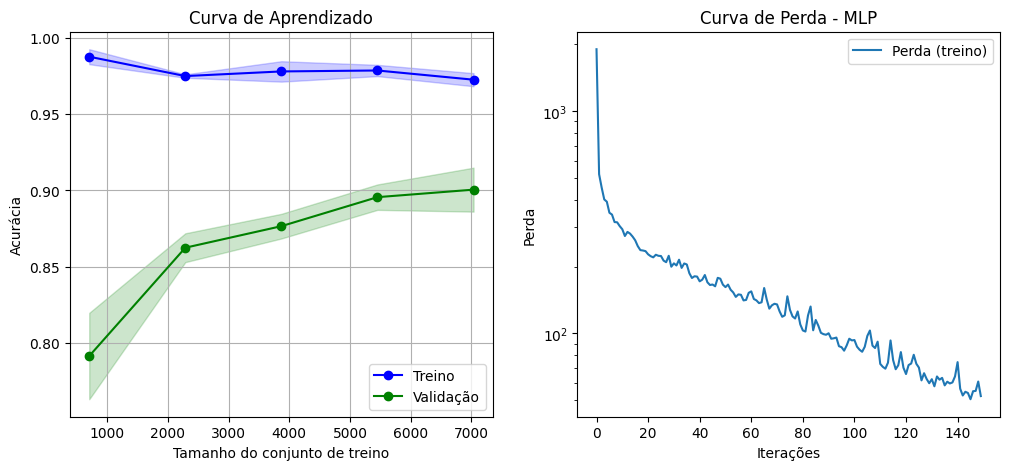

In [ ]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(train_sizes, train_mean, 'o-', color="blue", label="Treino")
ax[0].plot(train_sizes, val_mean, 'o-', color="green", label="Validação")

# Confidence range
ax[0].fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2, color="blue")
ax[0].fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2, color="green")

ax[0].set_title("Curva de Aprendizado")
ax[0].set_xlabel("Tamanho do conjunto de treino")
ax[0].set_ylabel("Acurácia")
ax[0].legend(loc="best")
ax[0].grid()

ax[1].semilogy(mlp_sk.loss_curve_, label="Perda (treino)")
ax[1].set_xlabel("Iterações")
ax[1].set_ylabel("Perda")
ax[1].set_title("Curva de Perda - MLP")
ax[1].legend()

plt.subplots_adjust(wspace=0.2)
plt.show()


DATA PLOTS

In [ ]:
# Best Model
y_pred = mlp_sk.predict(X_test)

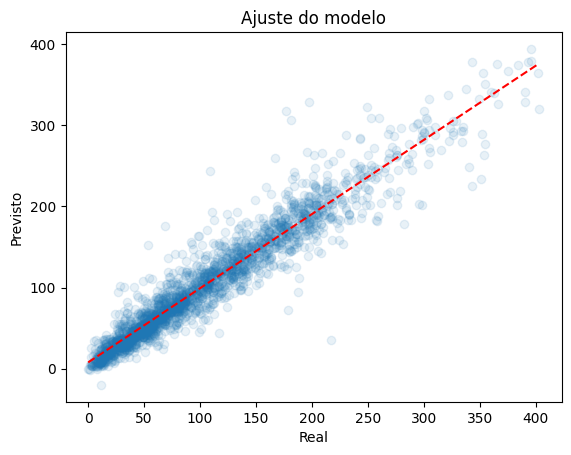

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

p = np.poly1d(np.polyfit(y_test, y_pred, 1))
xp = np.linspace(min(y_test), max(y_test), 500)
plt.scatter(y_test, y_pred, alpha=0.1, label='Previsto x Real')
plt.plot(xp, p(xp), 'r--', label='Polinomio 1 ordem')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Ajuste do modelo')
plt.show()

Plot with the 3th most significant features for the best model

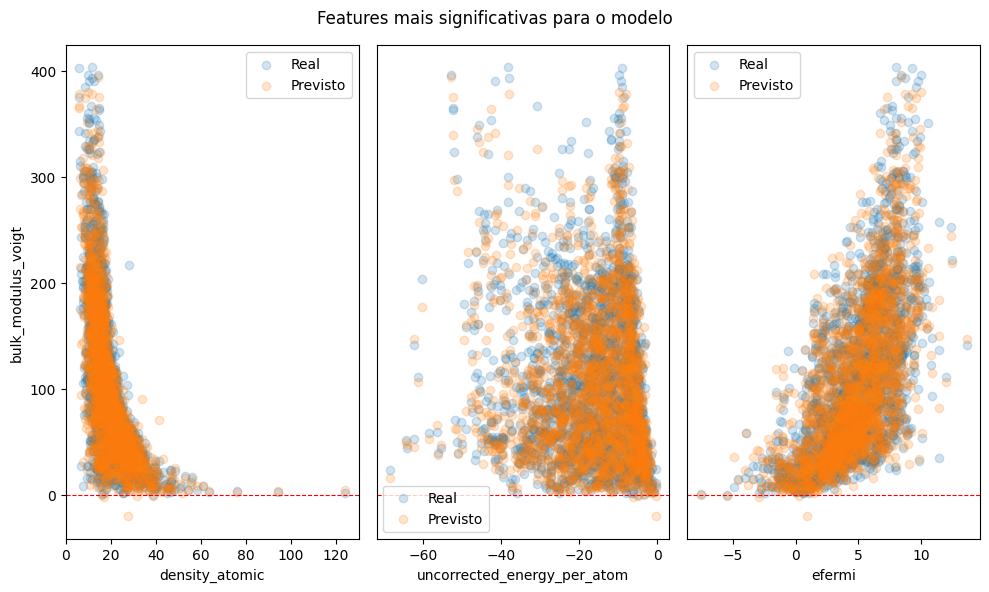

In [ ]:
imp_feat = ["density_atomic", "uncorrected_energy_per_atom", "efermi"]

fig, ax = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
for idx, feature in enumerate(imp_feat):
  ax[idx].scatter(df_test[feature], y_test, alpha=0.2, label='Real')
  ax[idx].scatter(df_test[feature], y_pred, alpha=0.2, label='Previsto')
  ax[idx].set_xlabel(feature)
  ax[idx].axhline(y=0, color='r', linestyle='--', linewidth=0.8)
  ax[idx].legend()
  if idx > 0:
    #ax[idx].tick_params(labelleft=False)
    ax[idx].yaxis.set_visible(False)

ax[0].set_ylabel('bulk_modulus_voigt')
fig.suptitle('Features mais significativas para o modelo')

plt.subplots_adjust(wspace=0.0)
plt.tight_layout()
plt.show()
